<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/Wk4_Model_selection_and_optimization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model selection and optimization

Importing necessary Libraries and Data

In [1]:
# Impoting general libraries
import warnings
import itertools
import random
from scipy.stats import uniform

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Class Imbalance
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score,precision_score, f1_score, roc_auc_score, confusion_matrix,mean_squared_error,r2_score

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
# importing the data

data=pd.read_csv('/content/creditcard.csv')


data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


# EDA and Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20412 entries, 0 to 20411
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20412 non-null  int64  
 1   V1      20412 non-null  float64
 2   V2      20412 non-null  float64
 3   V3      20412 non-null  float64
 4   V4      20412 non-null  float64
 5   V5      20412 non-null  float64
 6   V6      20412 non-null  float64
 7   V7      20412 non-null  float64
 8   V8      20412 non-null  float64
 9   V9      20412 non-null  float64
 10  V10     20412 non-null  float64
 11  V11     20412 non-null  float64
 12  V12     20412 non-null  float64
 13  V13     20412 non-null  float64
 14  V14     20412 non-null  float64
 15  V15     20412 non-null  float64
 16  V16     20412 non-null  float64
 17  V17     20412 non-null  float64
 18  V18     20412 non-null  float64
 19  V19     20412 non-null  float64
 20  V20     20412 non-null  float64
 21  V21     20412 non-null  float64
 22

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.804747e-12,-6.644481e-13,-5.733476e-13,7.602684e-13,2.290382e-13,6.119060e-14,3.241792e-14,-5.131360e-13,-7.735175e-13,...,-1.365215e-12,-7.572798e-13,-1.814482e-13,1.067890e-12,-6.013363e-13,-1.204946e-13,2.643612e-12,-3.222971e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
 data.shape

(20412, 31)

In [6]:
 #Missingness
data.isnull().sum().sort_values(ascending=False)



Class     1
Amount    1
V28       1
V27       1
V26       1
V25       1
V16       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
Time      0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V15       0
dtype: int64

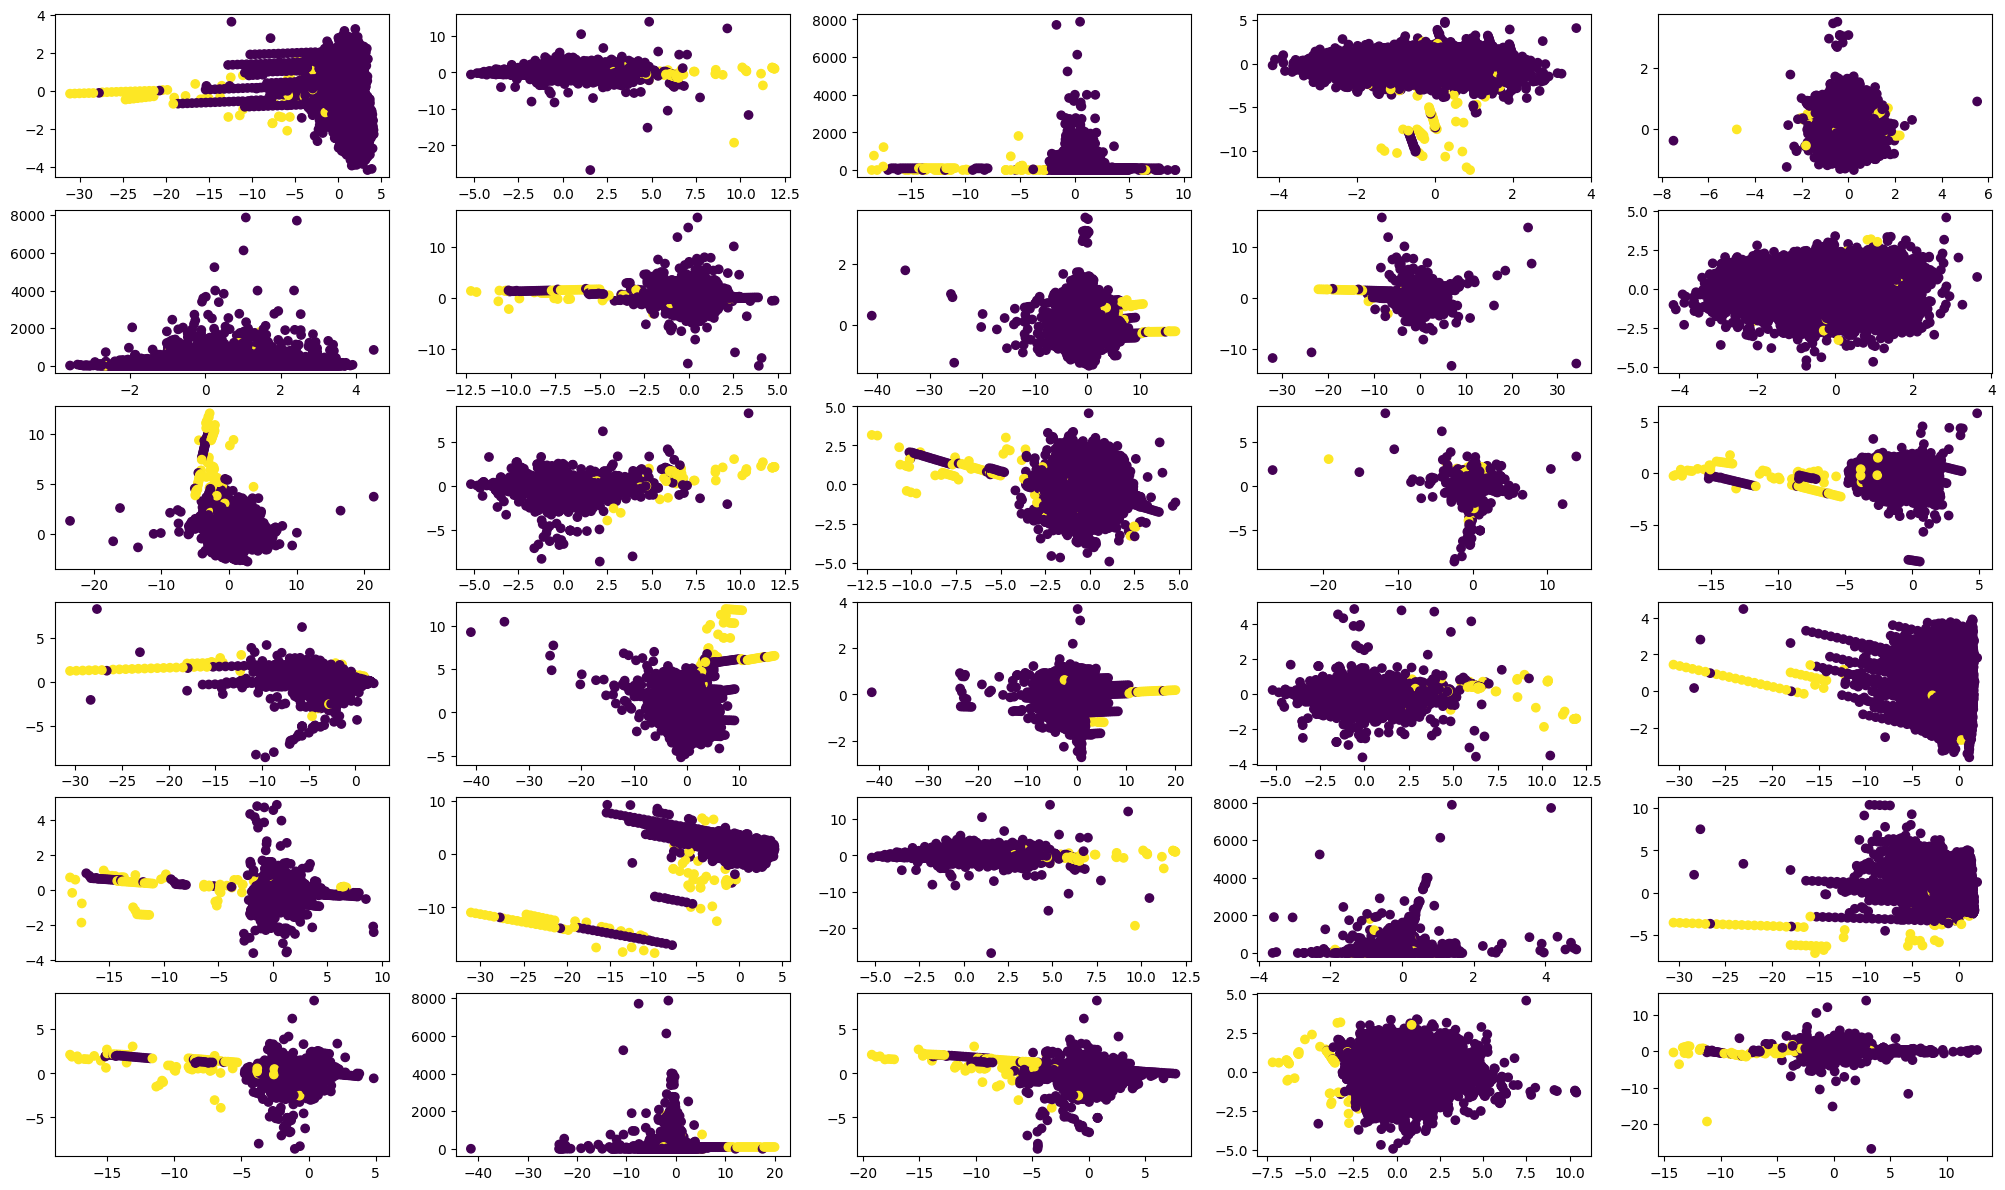

In [7]:
## Check for linear separability using Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2))
rand = random.choices(comb, k=30) #Randomly choose 30 bivariate relationships to visualise.
fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.Class)

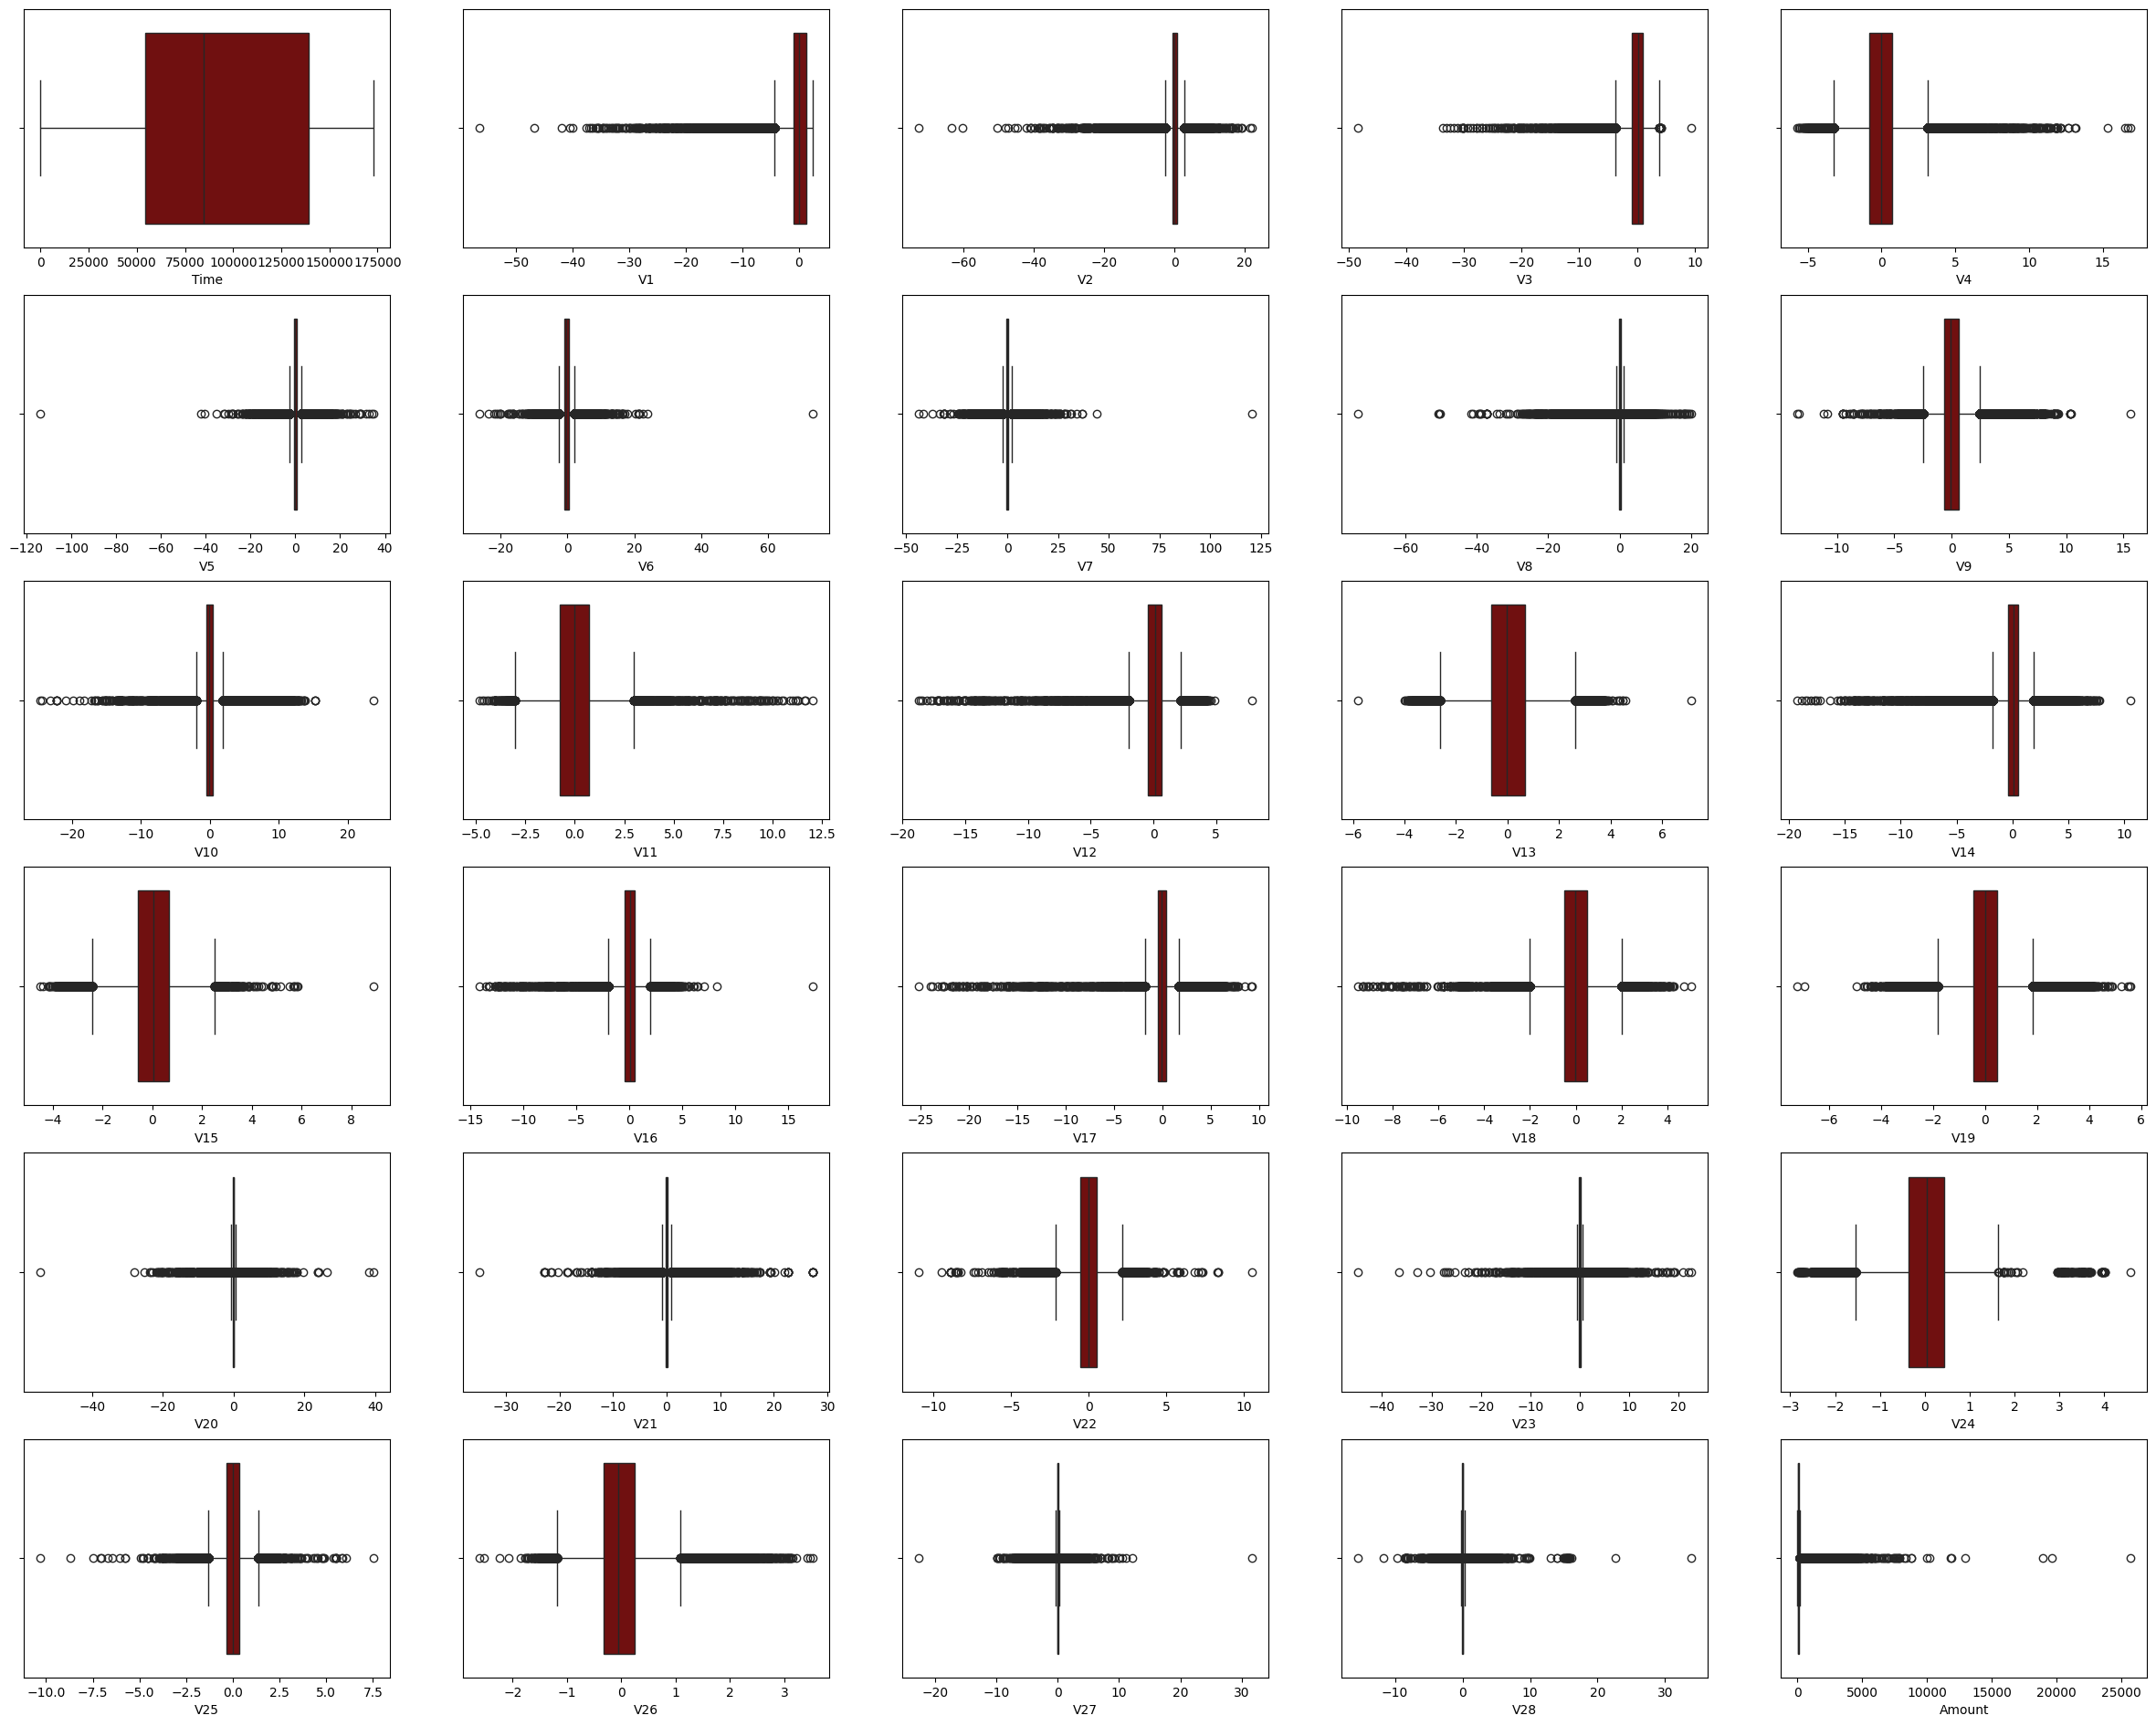

In [ ]:
## Check for outliers  using Unitvariate analysis of  variables
fig = plt.figure(figsize=(30,40))
for i,j in zip(data.columns,range(len(data.columns))):
    if i!='Class':
        ax = fig.add_subplot(10,5, j+1)
        sns.boxplot(data=data,x=data[i],orient='v',color="Maroon")

### Insights from Exploratory Data Analysis:
1. Most of the variables have outliers
2. A Model that can handle  outliers is required

# Modelling

In [8]:
##  Model Data Preparation
X = data.drop('Class',axis=1)
y = data['Class']



In [ ]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


## Hyperparameter Tuning



**Random Search CV**

RandomForest

In [ ]:
# # define the group of parameters to tune
model = RandomForestClassifier()
n_estimators =[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_depth=[int(x) for x in np.linspace(start=1,stop=20,num=5)]
max_features=[int(x) for x in np.linspace(start=5,stop=20,num=5)]

# set the Random search cv object
search_space ={
    "n_estimators" : n_estimators,
    'max_depth' :max_depth,
    'max_features':max_features,
    'criterion':['gini','entropy']}

clf = RandomizedSearchCV(model,search_space,n_iter=2,cv=5,scoring='accuracy',random_state=1)
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
# Fit randomforest model with the best params
pipe = make_pipeline(PolynomialFeatures(degree=2),RandomForestClassifier(n_estimators=700,max_depth=20,max_feautures=20,criterion='entropy'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

**Grid Search CV**

In [ ]:
# Define the model
model=RandomForestClassifier()
#Define parameter grid
param_grid= {'n_estimators':[50,100,150],'max_depth':[5,10,15],'criterion':['enthropy','gini']}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring=accuracy)

#fit the model
grid_search.fit(X_train,y_train)

# best parameter and best scores
print("Best_parameter:", grid_search.best_params_)
print("Best_Score:", grid_search.best_Score)
